<a href="https://colab.research.google.com/github/hamnahdurrani/Student_Stress_Survey_Analysis/blob/main/Student_Stress_Survery_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Survey on Stress and Well-being Factors Among College Students (Ages 18–21)


---

##About the Dataset:
This dataset captures survey responses from 843 college students aged 18–21 regarding their experiences with stress, health, relationships, academics, and emotional well-being. The responses were collected via Google Forms using a five-point Likert scale ("Not at all" to "Extremely") and anonymized to protect privacy.
It enables nuanced analysis of emotional and physical stress indicators and their correlations with academic performance and lifestyle factors.


---
##Key Features (Selected):
####Demographic
* Gender: Coded as 0 (Male), 1 (Female)
* Age: Numeric age (18 to 21)
####Emotional and Stress Indicators
* Have you recently experienced stress in your life?
* Have you noticed a rapid heartbeat or palpitations?
* Have you been dealing with anxiety or tension recently?
* Do you face any sleep problems or difficulties falling asleep?
* Do you have trouble concentrating on your academic tasks?
* Have you been feeling sadness or low mood?
* Do you get irritated easily?
* Do you often feel lonely or isolated?
#### Physical and Health Indicators
* Have you been getting headaches more often than usual?
* Have you been experiencing any illness or health issues?
* Have you gained/lost weight?
#### Academic & Environment Stressors
* Do you feel overwhelmed with your academic workload?
Are you in competition with your peers, and does it affect you?
* Do you lack confidence in your academic performance?
* Do you lack confidence in your choice of academic subjects?
* Academic and extracurricular activities conflicting for you?
* Do you attend classes regularly?
* Are you facing any difficulties with your professors or instructors?
* Is your working environment unpleasant or stressful?
* Is your hostel or home environment causing you difficulties?
#### Social & Relationship Factors
* Do you find that your relationship often causes you stress?
* Do you struggle to find time for relaxation and leisure activities?
#### Stress Type
* Which type of stress do you primarily experience?: Eustress, Distress, No Stress


## Citation

@article{ovi2025protecting, <br>
  title={Protecting Student Mental Health with a Context-Aware Machine Learning Framework for Stress Monitoring},<br>
  author={Ovi, Md Sultanul Islam and Hossain, Jamal and Rahi, Md Raihan Alam and Akter, Fatema}, <br>
  journal={arXiv preprint arXiv:2508.01105},<br>
  year={2025}
}


##Importing all required Libraries

In [1]:
!pip install pandas numpy seaborn matplotlib scikit-learn

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from scipy import stats
from scipy.stats import norm

#Setting visualisation sytle
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('magma')

Importing data from kaggle

In [3]:
import kagglehub

path  = kagglehub.dataset_download('mdsultanulislamovi/student-stress-monitoring-datasets', path = 'Stress_Dataset.csv')
data = pd.read_csv(path)
#First 5 rows of the dataset
data.head(5)

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [4]:
print("Number of rows : ", data.shape[0])
print("Number of columns : ", data.shape[1])
data.info()

Number of rows :  843
Number of columns :  26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1   

## Deleting duplicates, renaming columns and cleaning outliers

In [5]:
del data["Have you been dealing with anxiety or tension recently?.1"]
print("Missing Values: \n", data.isnull().sum())

Missing Values: 
 Gender                                                                  0
Age                                                                     0
Have you recently experienced stress in your life?                      0
Have you noticed a rapid heartbeat or palpitations?                     0
Have you been dealing with anxiety or tension recently?                 0
Do you face any sleep problems or difficulties falling asleep?          0
Have you been getting headaches more often than usual?                  0
Do you get irritated easily?                                            0
Do you have trouble concentrating on your academic tasks?               0
Have you been feeling sadness or low mood?                              0
Have you been experiencing any illness or health issues?                0
Do you often feel lonely or isolated?                                   0
Do you feel overwhelmed with your academic workload?                    0
Are you in competiti

In [6]:
data = data.set_axis(["Gender", "Age", "Stress", "Palpitations", "Anxiety", "Sleep Issues", "Headaches", "Irritatable", "Low Concentration", "Sadness", "Illness", "Lonely", "Workload", "Competition", "Relationship Stress", "Professor problems", "Stressful Work Env", "Lack of lesiure time", "Stressful Home Env", "Low Performance Confidence", "Low Subject Confidence", "Extracurricular activity conflict", "Attendance","Weight Change", "Stress Type"], axis=1)
data["Stress Type"] = data["Stress Type"].replace({
    'No Stress - Currently experiencing minimal to no stress.': 'None',
    'Eustress (Positive Stress) - Stress that motivates and enhances performance.': 'Positive',
    'Distress (Negative Stress) - Stress that causes anxiety and impairs well-being.': 'Negative'
})
print("Duplicated Values : ",data.duplicated().sum())

Duplicated Values :  27


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
print("Statistics : \n", data.describe())

Statistics : 
            Gender         Age      Stress  Palpitations     Anxiety  \
count  816.000000  816.000000  816.000000    816.000000  816.000000   
mean     0.356618   20.080882    3.018382      2.761029    2.541667   
std      0.479294    5.513025    1.128941      1.123317    1.209666   
min      0.000000   14.000000    1.000000      1.000000    1.000000   
25%      0.000000   19.000000    2.000000      2.000000    2.000000   
50%      0.000000   19.000000    3.000000      3.000000    2.000000   
75%      1.000000   20.000000    4.000000      4.000000    3.000000   
max      1.000000  100.000000    5.000000      5.000000    5.000000   

       Sleep Issues   Headaches  Irritatable  Low Concentration     Sadness  \
count    816.000000  816.000000   816.000000         816.000000  816.000000   
mean       2.796569    2.622549     2.672794           2.691176    2.577206   
std        1.254308    1.257003     1.303904           1.303218    1.225063   
min        1.000000    1.0000

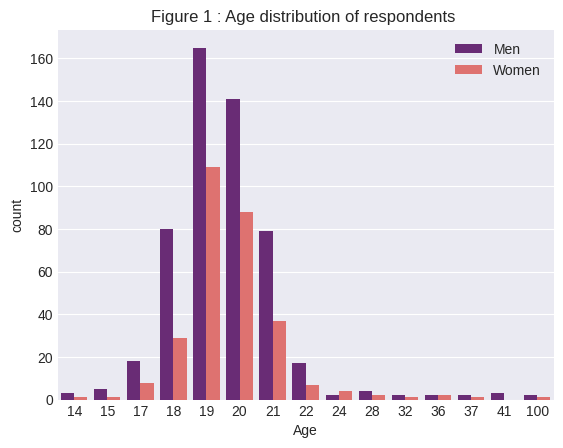

In [9]:
sns.countplot(data = data, x = 'Age', hue = 'Gender', palette='magma' )
plt.legend(labels=["Men", "Women"])
plt.title("Figure 1 : Age distribution of respondents ")
plt.show()

In figure 1, we see that most of the survey respondants are in the age group of 18-21 with most of them being men. Since this survery is only for college students from ages 18 to 21, we will remove all other entries as they are invalid

In [10]:
data = data[(data['Age'] >= 18) & (data['Age'] <= 21)]

In [11]:
features = data.iloc[:,2:24].columns
outliers = {}
for col in features:
    invalid = data.loc[~data[col].between(0, 5), col]
    if col in ['Age']:
        continue
    if not invalid.empty:
        outliers[col] = {
            "count": invalid.shape[0],
            "values": invalid.unique().tolist()
        }

print("Number of outliers : ",len(outliers))

Number of outliers :  0


We see that the features have no outliers since they are all within the range of 1-5 with the exception of the Gender and Age columns.

In [12]:
print(data['Stress Type'].value_counts())

Stress Type
Positive    667
None         37
Negative     24
Name: count, dtype: int64


One Hot Encoding categorical variable : Type of stress <br> Stress_None : No Stress - Currently experiencing minimal to no stress <br> Stress_Postive :Eustress - Stress that motivates and enhances performance <br> Stress_Negative : Distress - Stress that causes anxiety and impairs well-being <br>
0 : False, 1 = True

In [13]:
one_hot = pd.get_dummies(data['Stress Type'], prefix='Stress', dtype=int)
data = pd.concat([data, one_hot], axis=1)

**Univariate Analysis** : Analysing each feature and its distribution

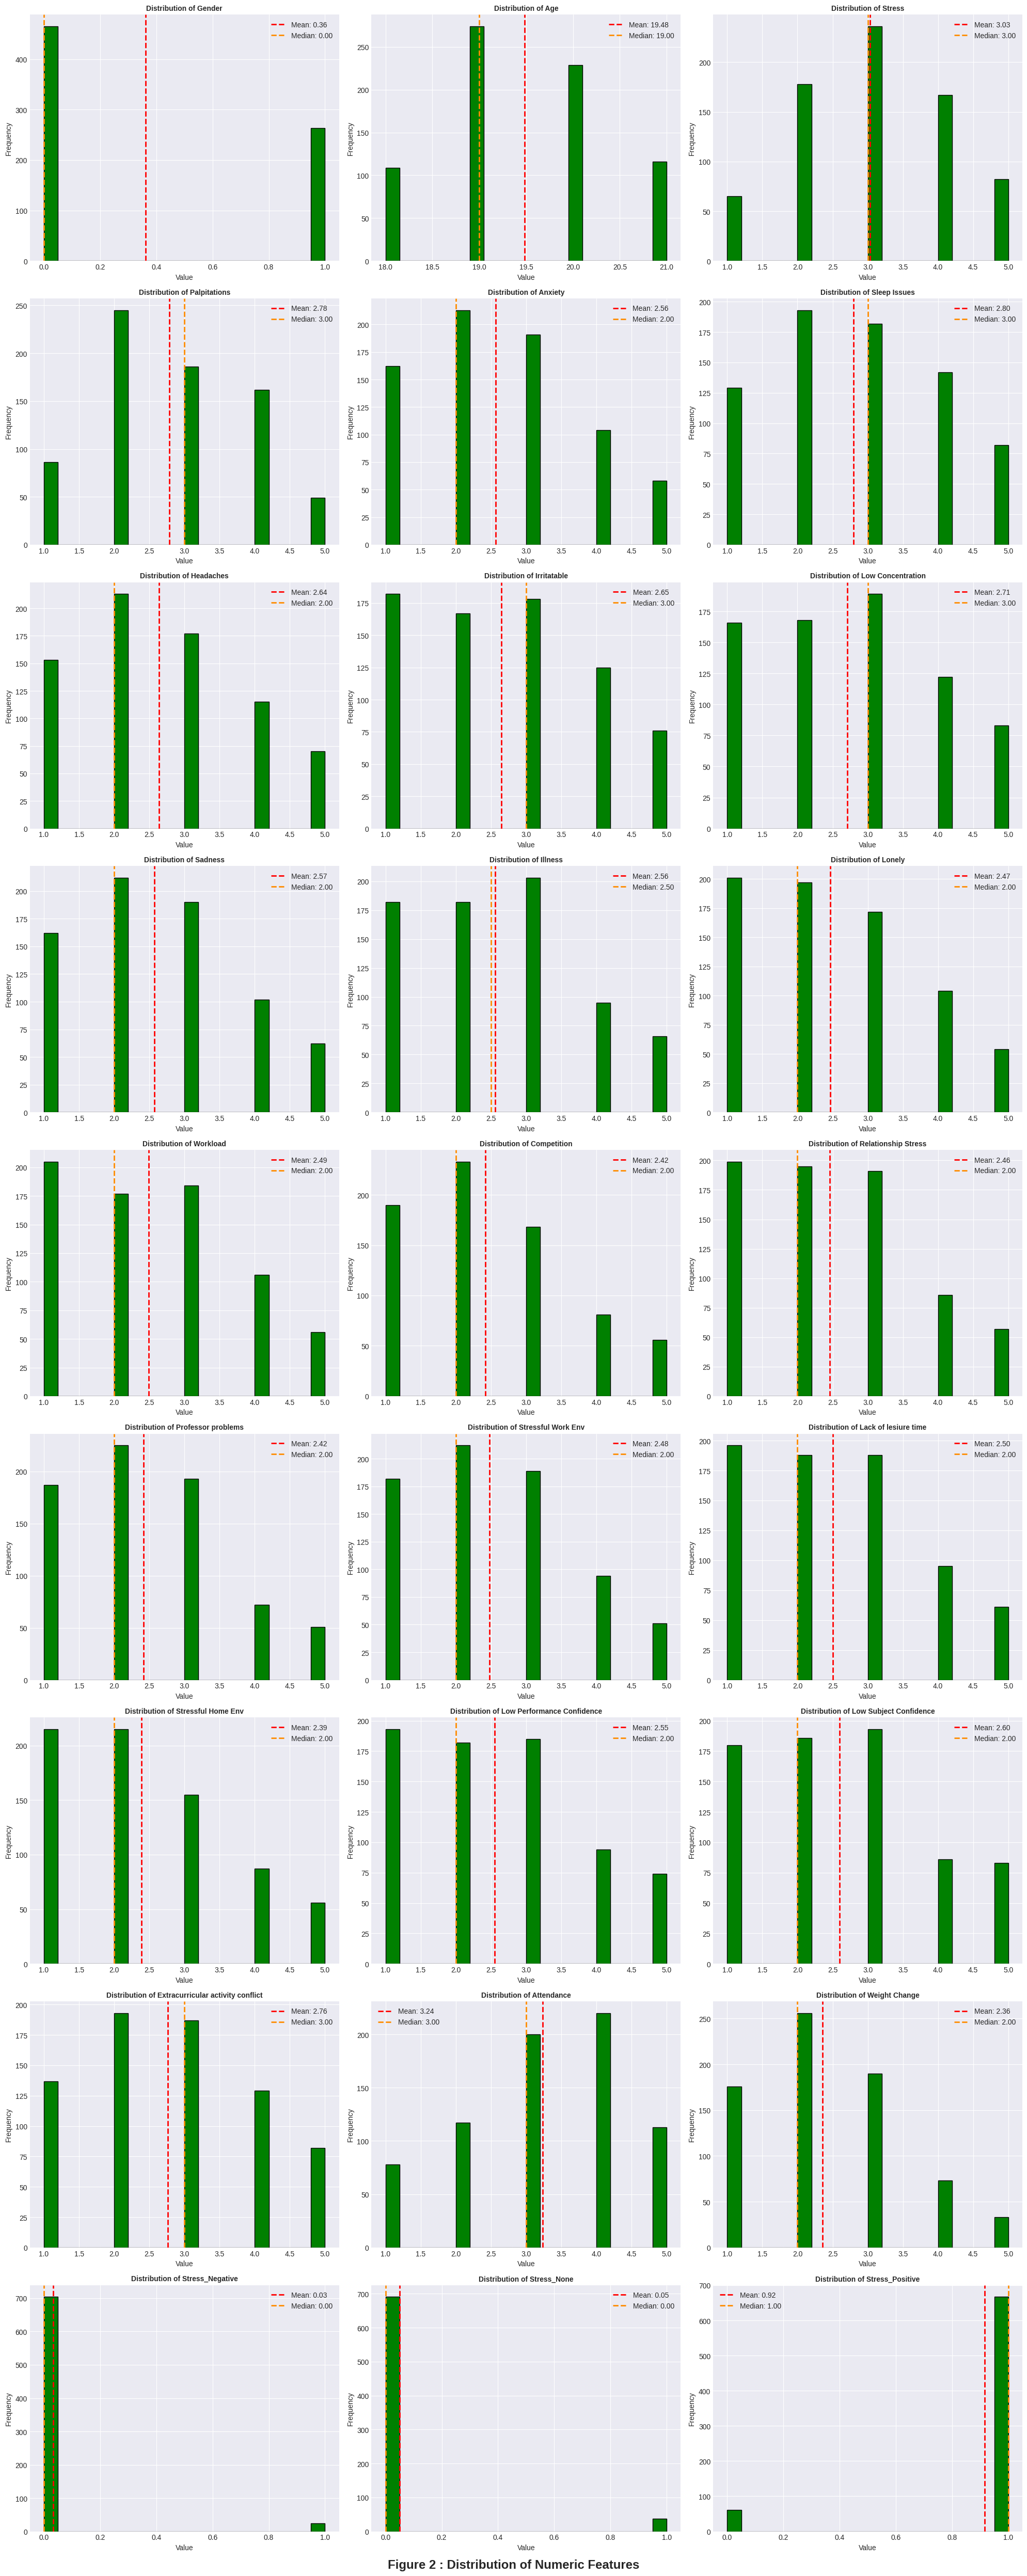

In [14]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(9, 3, figsize=(20,50))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    # Use different shades of blue for histograms
    axes[idx].hist(data[col], bins=20, edgecolor='black', color='green')
    # Setting Labels
    axes[idx].set_title(f'Distribution of {col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

    # Add mean and median lines
    mean_val = data[col].mean()
    median_val = data[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()
# Deleting extra subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])
plt.suptitle("Figure 2 : Distribution of Numeric Features", x=0.5, y = 0,fontweight='bold', fontsize='xx-large')
plt.tight_layout()
plt.show()

In [15]:
print("Skewness : \n", data[numeric_cols].skew())

Skewness : 
 Gender                               0.578820
Age                                  0.083842
Stress                               0.034779
Palpitations                         0.214667
Anxiety                              0.394216
Sleep Issues                         0.184373
Headaches                            0.355616
Irritatable                          0.270238
Low Concentration                    0.238286
Sadness                              0.399764
Illness                              0.378116
Lonely                               0.449330
Workload                             0.397060
Competition                          0.585622
Relationship Stress                  0.478514
Professor problems                   0.560790
Stressful Work Env                   0.456150
Lack of lesiure time                 0.432472
Stressful Home Env                   0.591849
Low Performance Confidence           0.413906
Low Subject Confidence               0.408485
Extracurricular activ

**Understanding Target Variable : Stress**

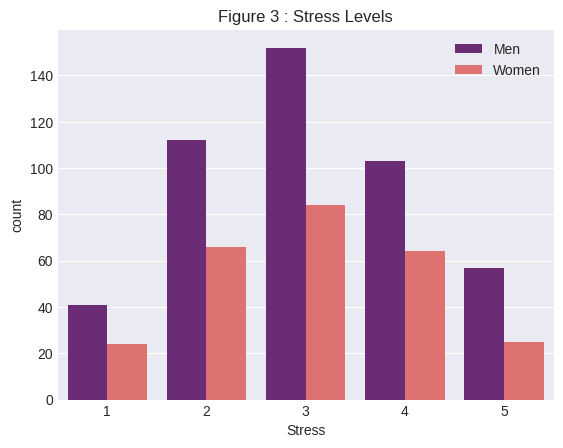

In [16]:
sns.countplot(data = data, hue = 'Gender', x = 'Stress', palette ='magma')
plt.legend(labels=["Men", "Women"])
plt.title("Figure 3 : Stress Levels")
plt.show()

In figure 3, we see men having higher stress levels than women

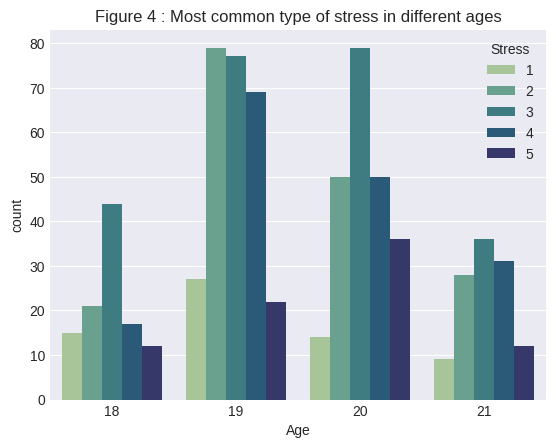

In [17]:
sns.countplot(data = data, x = 'Age', hue = 'Stress', palette='crest')
plt.title("Figure 4 : Most common type of stress in different ages")
plt.show()

In figure 4, we see that students of age 19 and 20 are extremely likely to experience stress,


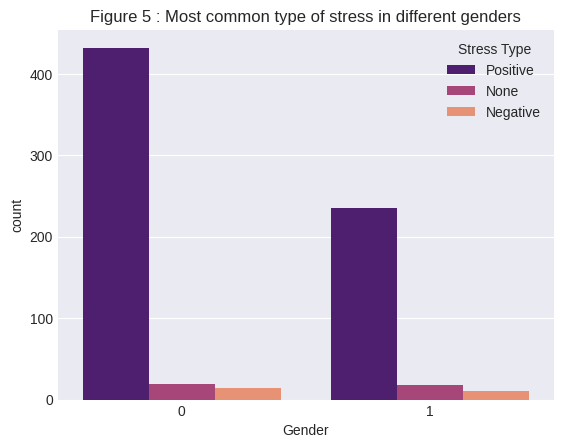

In [18]:
sns.countplot(data = data, x = 'Gender', hue = 'Stress Type', palette = 'magma')
plt.title("Figure 5 : Most common type of stress in different genders")
plt.show()

in Figure 5, we see students mainly experience eustress - Stress that motivates and enhances performance.

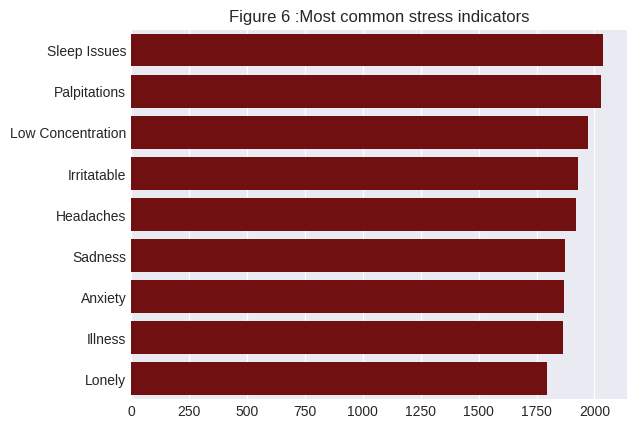

In [19]:
symptoms = data.iloc[:,3:12].sum().sort_values(ascending = False)
sns.barplot(data = symptoms, orient = 'h', errorbar = None, color='maroon')
plt.title("Figure 6 :Most common stress indicators")
plt.show()

In figure 6, Sleep Issues are the most common stress indicators in students. Most of them are physical symptoms than mental symptoms.

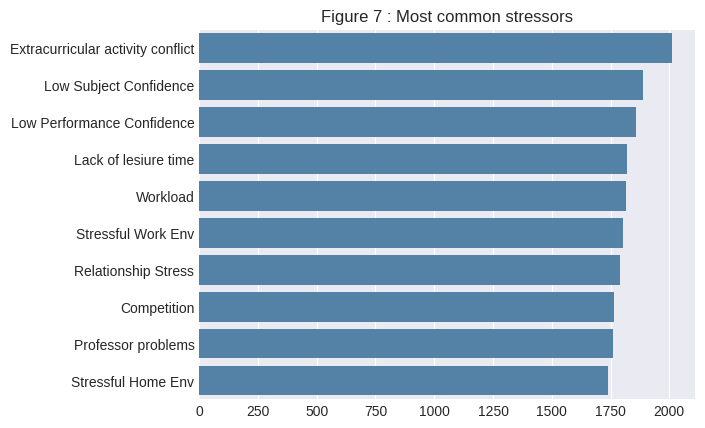

In [20]:
stressors = data.iloc[:,12:22].sum().sort_values(ascending = False)
sns.barplot(data = stressors, orient = 'h', errorbar = None, color='steelblue')
plt.title("Figure 7 : Most common stressors")
plt.show()

In figure 7, we see that students often get stressed because of extracurricular activities conflict, low subject confidence, low performance
 confidence and lack of leisure time. Two of these are due to lack of time and the others are due to academics

Correlation analysis

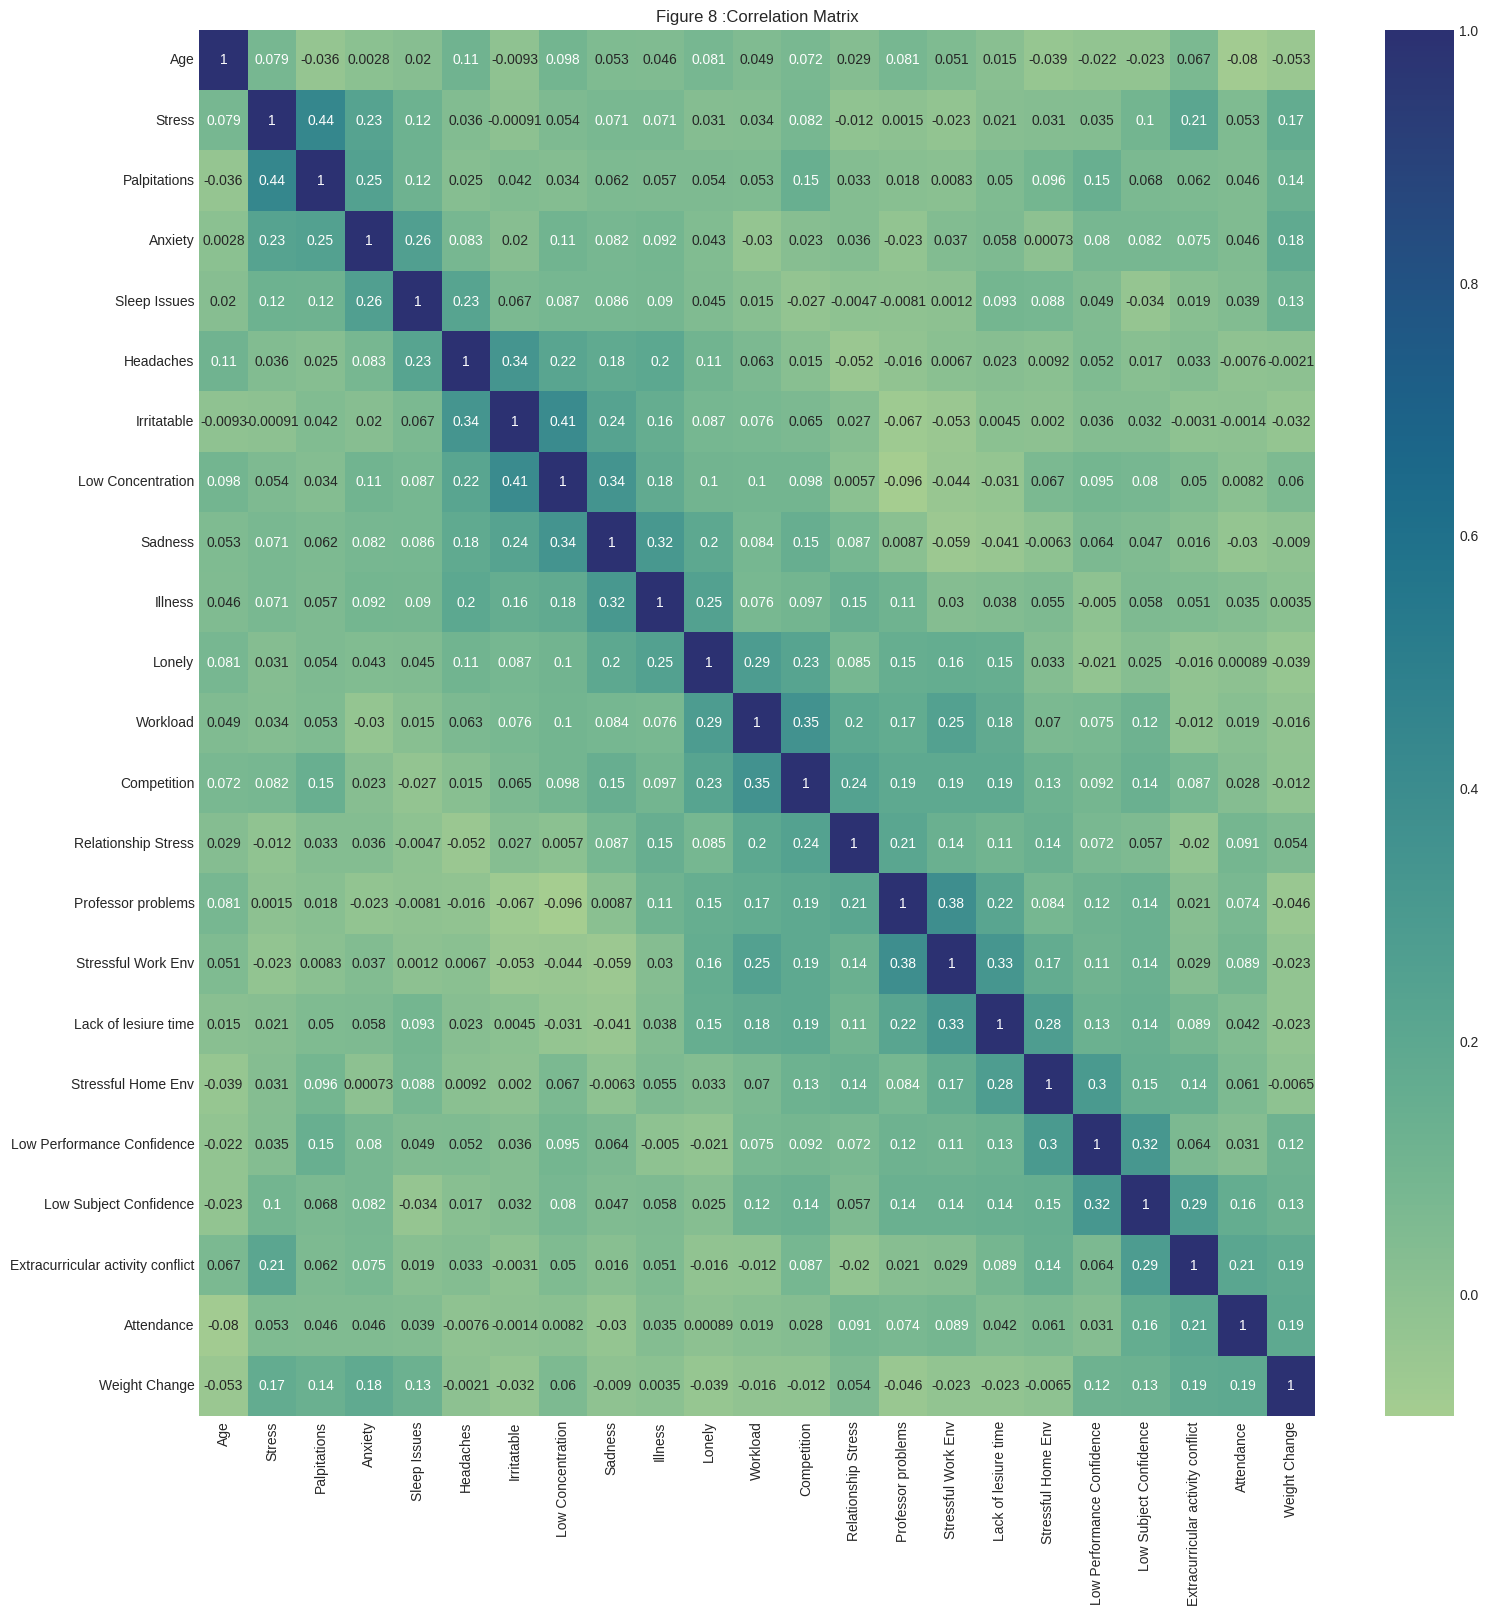

In [21]:
features_corr = data.iloc[:,1:24].corr()
plt.figure(figsize=(18,18))
sns.heatmap(features_corr, annot=True, cmap='crest')
plt.title("Figure 8 :Correlation Matrix")
plt.show()

In [22]:
stress_corr = data.iloc[:,2:22].corrwith(data['Stress']).drop('Stress')
stress_corr = stress_corr.sort_values(ascending = False)
print("Top 10 most correlated features with Stress : \n ")
stress_corr.head(10)

Top 10 most correlated features with Stress : 
 


,0
Palpitations,0.442158
Anxiety,0.234515
Extracurricular activity conflict,0.211398
Sleep Issues,0.122243
Low Subject Confidence,0.100270
Competition,0.081919
Illness,0.071224
Sadness,0.070618
Low Concentration,0.054007
Headaches,0.036473


In [23]:
print("Bottom 10 most correlated features Stress : \n ")
stress_corr.tail(10)

Bottom 10 most correlated features Stress : 
 


,0
Headaches,0.036473
Low Performance Confidence,0.035294
Workload,0.033619
Lonely,0.030624
Stressful Home Env,0.030525
Lack of lesiure time,0.020917
Professor problems,0.001477
Irritatable,-0.000909
Relationship Stress,-0.012467
Stressful Work Env,-0.023357


We see that none of the features are highly correlated (threshold for correlation is an absolute value of 0.5). We will now see the co-occurences of the features to derive some insights

In [24]:
symptoms = data.iloc[:,2:22]
binary_symptoms = (symptoms > 3).astype(int)
co_occurrence = binary_symptoms.T.dot(binary_symptoms)
co_occurrence.sort_values(by='Stress',ascending = False, inplace = True)
co_occurrence

,Stress,Palpitations,Anxiety,Sleep Issues,Headaches,Irritatable,Low Concentration,Sadness,Illness,Lonely,Workload,Competition,Relationship Stress,Professor problems,Stressful Work Env,Lack of lesiure time,Stressful Home Env,Low Performance Confidence,Low Subject Confidence,Extracurricular activity conflict
Stress,249,117,77,99,69,75,81,73,64,51,58,55,49,41,48,63,54,61,72,105
Palpitations,117,211,71,85,54,64,61,55,52,54,57,53,55,37,45,52,53,64,51,59
Extracurricular activity conflict,105,59,49,65,60,56,76,56,53,45,48,38,39,39,48,51,55,64,84,211
Sleep Issues,99,85,75,224,94,78,76,63,59,53,49,40,47,39,40,64,56,58,46,65
Low Concentration,81,61,55,76,87,101,205,83,71,51,53,42,44,22,44,43,52,58,53,76
Anxiety,77,71,162,75,40,38,55,42,42,35,30,28,40,23,40,46,32,48,38,49
Irritatable,75,64,38,78,91,201,101,65,62,56,48,39,37,38,38,43,43,56,49,56
Sadness,73,55,42,63,58,65,83,164,70,59,44,47,37,31,33,43,27,52,41,56
Low Subject Confidence,72,51,38,46,41,49,53,41,39,37,51,37,29,37,43,47,39,65,169,84
Headaches,69,54,40,94,185,91,87,58,69,54,44,33,34,28,38,41,37,49,41,60


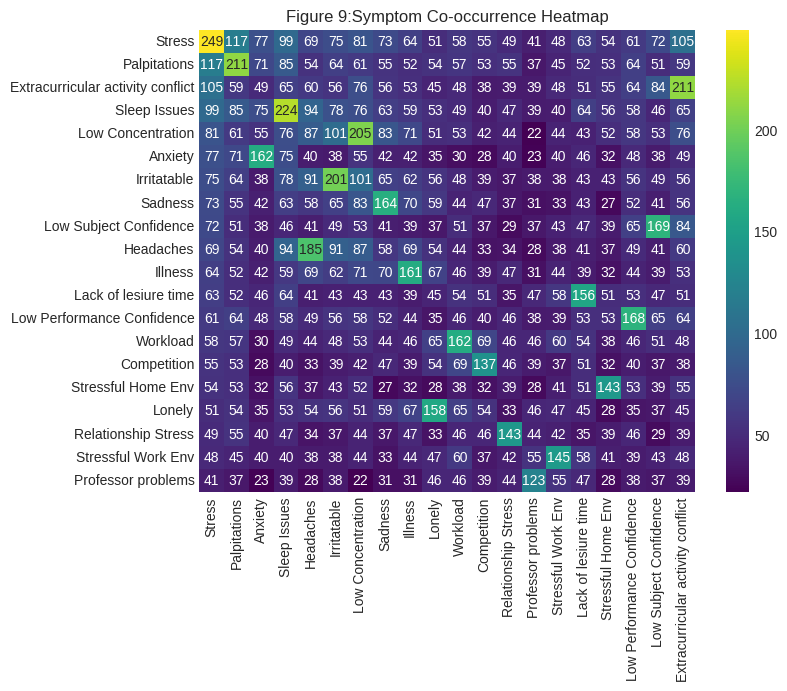

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(co_occurrence, annot=True, cmap="viridis", fmt="d")
plt.title("Figure 9:Symptom Co-occurrence Heatmap")
plt.show()

In figure 9 we see Sleep Issues and Palpitations are the most common symptoms that occur with stress. From the co-occurence chart we can see that the most common stressor that are reported by students experiencing stress is extracurricular activities conflict.

**Analyzing Dominant Stress Domain**

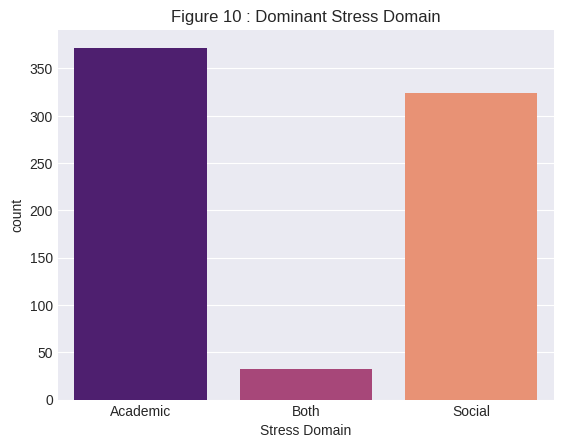

In [26]:
academic_factors = ['Workload', 'Competition', 'Low Subject Confidence', 'Low Performance Confidence', 'Professor problems','Extracurricular activity conflict']
social_factors = ['Stressful Work Env', 'Stressful Home Env', 'Relationship Stress','Lack of lesiure time']
data.loc[:,"Avg Academic Stress"] = data[academic_factors].mean(axis=1)
data.loc[:,"Avg Social Stress"]   = data[social_factors].mean(axis=1)
data.loc[:,"Stress Domain"] = np.select(
    [data["Avg Academic Stress"] > data["Avg Social Stress"],
     data["Avg Academic Stress"] < data["Avg Social Stress"]],
    ["Academic", "Social"],
    default="Both"
)
sns.countplot(data = data, x = 'Stress Domain', hue='Stress Domain', legend=False,palette='magma')
plt.title("Figure 10 : Dominant Stress Domain")
plt.show()

Figure 10 tell us that students are more likely to experience academic stress than social stress. The common stressors being high workload, colleagues competition, low subject confidence, low performance confidence, professor problems and extracurricular activity conflict.

**Bivariate Analysis** : Analyzing the relationship between Stress and the top 10 most correlated features

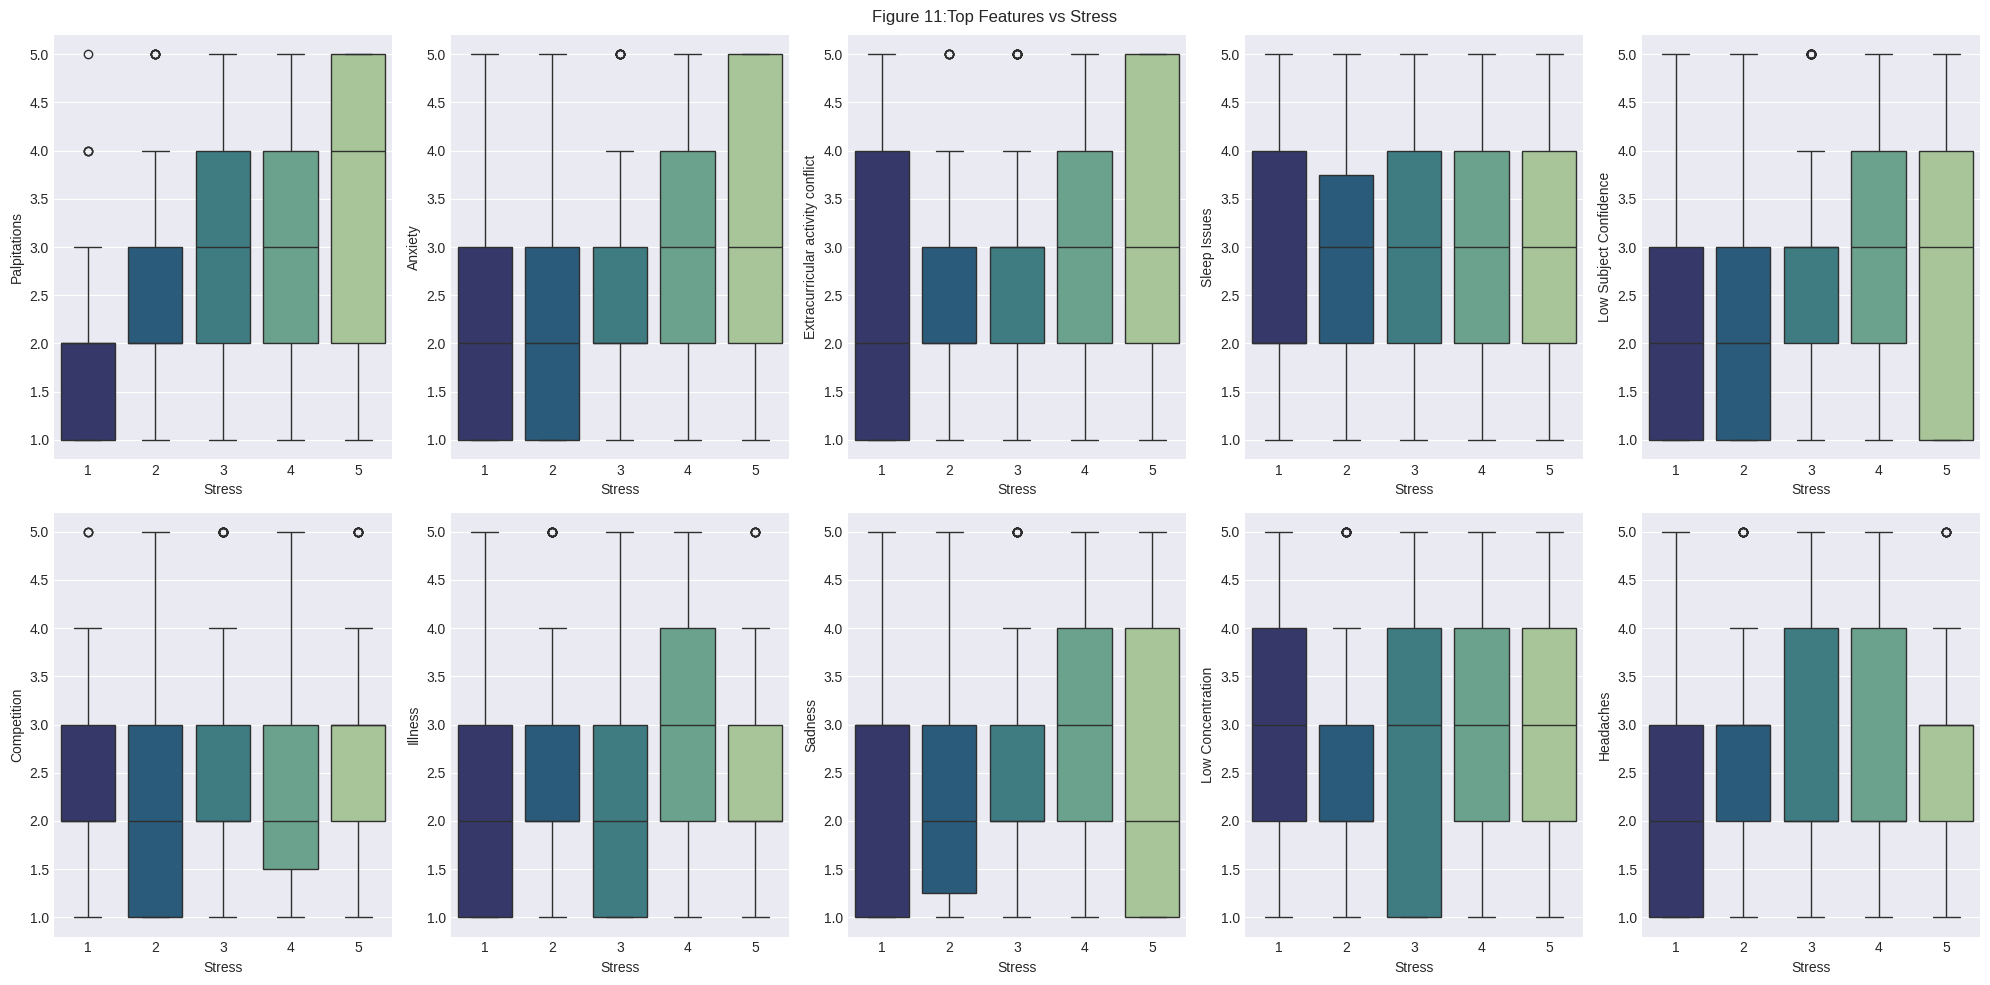

In [27]:
top_features = stress_corr.abs().nlargest(10).index.tolist()
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()
for idx, feature in enumerate(top_features):
    sns.boxplot(data=data, x='Stress', y=feature, ax=axes[idx], hue = 'Stress',palette='crest_r', legend=False)
plt.suptitle("Figure 11:Top Features vs Stress")
plt.tight_layout()
plt.show()

**PCA Analysis** : a statistical technique that simplifies complex data sets by reducing the number of variables while retaining key information. PCA identifies new uncorrelated variables that capture the highest variance in the data.

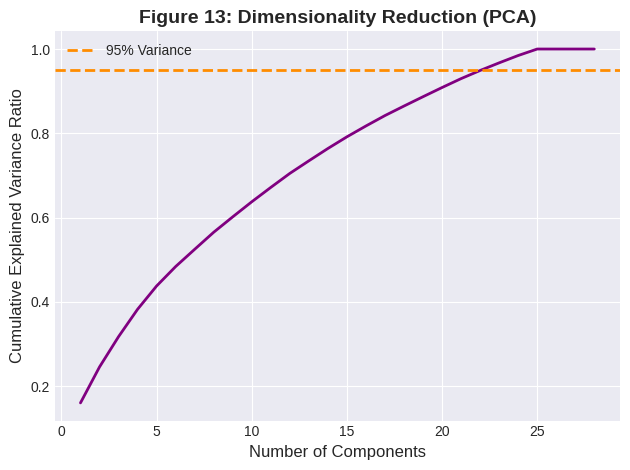


Number of components needed for 95% variance: 23


In [28]:
X = data.select_dtypes(include=['int64', 'float64']).drop('Stress', axis = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, color='purple',linewidth=2)
plt.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance Ratio', fontsize=12)
plt.title('Figure 13: Dimensionality Reduction (PCA)', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of components needed for 95% variance: {n_components_95}")

Avg Academic Stress                  0.397499
Avg Social Stress                    0.365513
Stressful Work Env                   0.250786
Competition                          0.249085
Lack of lesiure time                 0.248762
Stress_Negative                      0.239842
Workload                             0.231390
Low Subject Confidence               0.224322
Stressful Home Env                   0.222945
Professor problems                   0.222571
Low Performance Confidence           0.207432
Stress_None                          0.200242
Relationship Stress                  0.196317
Lonely                               0.161473
Extracurricular activity conflict    0.146047
Illness                              0.128319
Palpitations                         0.117079
Sadness                              0.100279
Attendance                           0.100175
Low Concentration                    0.096896
Anxiety                              0.090223
Headaches                         

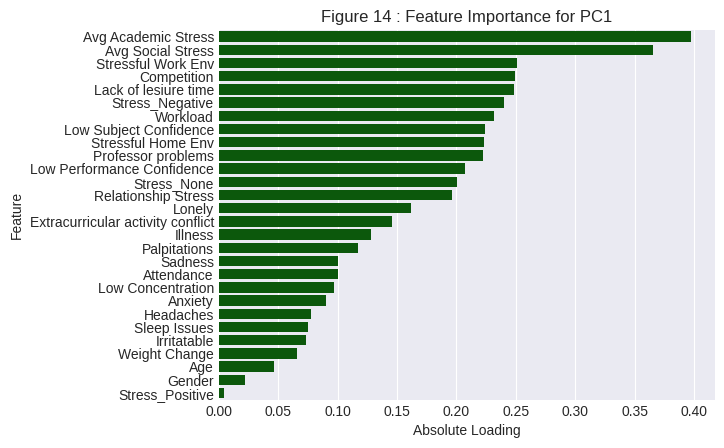

In [29]:
loadings = pd.DataFrame(pca.components_.T, index= X.columns, columns=[f"PC{i+1}" for i in range(len(pca.components_))])
pc1_importance = loadings["PC1"].abs().sort_values(ascending=False)
print(pc1_importance)
sns.barplot(x=pc1_importance.values, y=pc1_importance.index, color="darkgreen")
plt.title("Figure 14 : Feature Importance for PC1")
plt.xlabel("Absolute Loading")
plt.ylabel("Feature")
plt.show()

# Conclusion

Analysis and Recommendations:
The dataset indicates that a significant number of students experience stress primarily due to poor time management, conflicting extracurricular commitments, and limited opportunities for relaxation. These factors contribute more noticeably to physiological symptoms than to psychological ones. The findings also highlight that male students aged 19–20 represent the most stressed demographic group, suggesting that interventions should be tailored to their specific needs. Additionally, ineffective time management appears closely linked to reduced confidence in both subject mastery and overall academic performance.

To address these challenges, we recommend implementing structured interventions such as workshops on time management and the importance of adequate sleep, mentorship programs to support students in prioritizing tasks, and policies that allow optional participation in less critical activities. Furthermore, incorporating stress-relief initiatives such as yoga or mindfulness sessions could provide students with healthier coping mechanisms and promote overall well-being.